# Iris Flower Classification

Name :- Manoj Kumar Sen

Task 3: classify iris flowers into different species based on their sepal and petal measurements.

### Load the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('IRIS.CSV')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Visualization 

#### Catplot

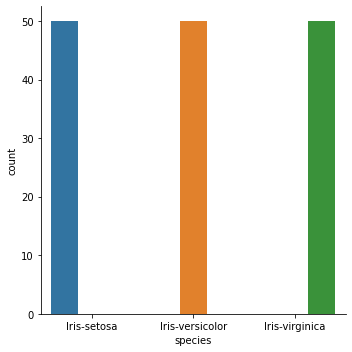

In [8]:
sns.catplot(x = 'species', hue = 'species', kind = 'count', data = df)

Bar plot for Species Vs Petal Width

<BarContainer object of 150 artists>

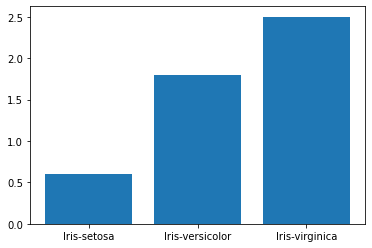

In [9]:
plt.bar(df['species'],df['petal_width'])

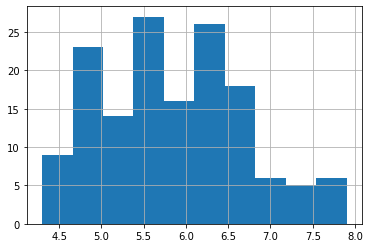

In [10]:
df['sepal_length'].hist()
plt.show()

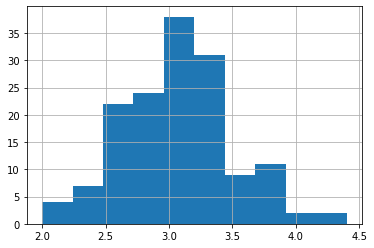

In [11]:
df['sepal_width'].hist()
plt.show()

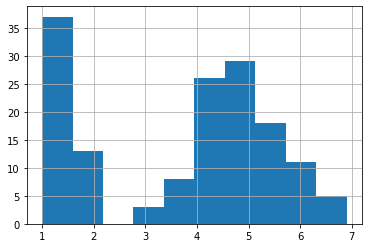

In [12]:
df['petal_length'].hist()
plt.show()

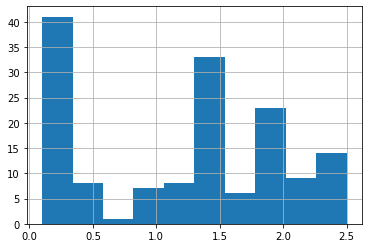

In [13]:
df['petal_width'].hist()
plt.show()

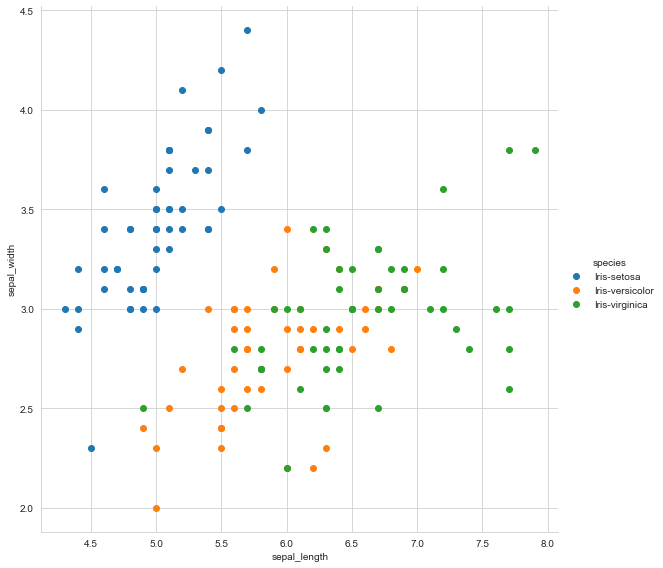

In [14]:
##scatter plot
sns.set_style("whitegrid");
g = sns.FacetGrid(df, hue = "species", height = 8)
g.map (plt.scatter, "sepal_length","sepal_width")
g.add_legend();
plt.show();

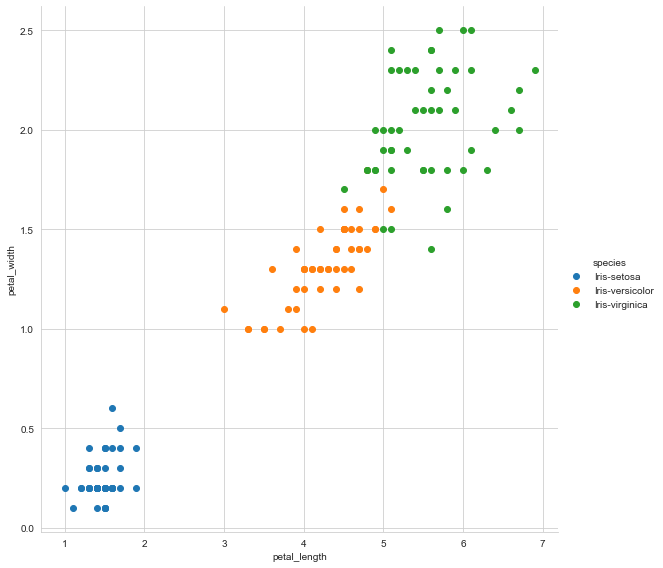

In [15]:
sns.set_style("whitegrid")
g=sns.FacetGrid(df,hue="species",height=8)
g.map(plt.scatter,"petal_length","petal_width")
g.add_legend();
plt.show();

#### PairPlot

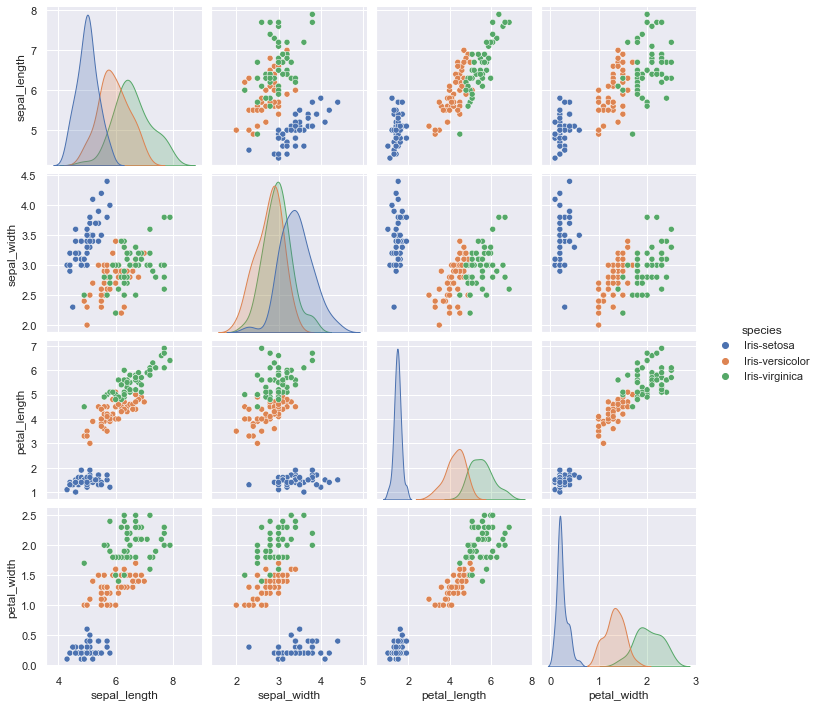

In [16]:
sns.set()
sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','species']], hue = "species", diag_kind="kde")

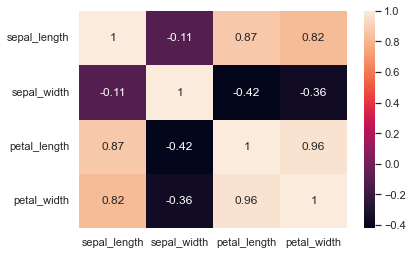

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

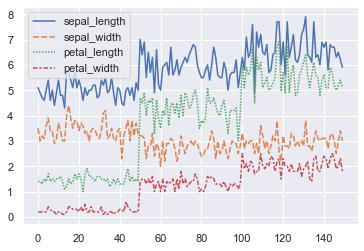

In [18]:
sns.lineplot(data=df.drop(['species'], axis=1))
plt.show()

### Data processing 

In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
#dropping the 'species' column

X = df.drop(['species'], axis=1)

In [24]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Encoding the categorical feature as a one-hot numeric feature

In [25]:

Label_Encode = LabelEncoder()
Y = df['species']
Y = Label_Encode.fit_transform(Y)

In [26]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
df['species'].nunique()

3

In [28]:
X = np.array(X)

In [29]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Spliting the dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [32]:
X_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [33]:
X_train.shape

(105, 4)

In [34]:
X_test.shape

(45, 4)

In [35]:
Y_test.shape

(45,)

In [36]:
Y_train.shape

(105,)

### Model Preparation

### KNN Algorithm

In [37]:
#training the model

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std = standard_scaler.transform(X_test)

In [38]:
X_train_std

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ],
       [ 0.1222285 , -1.92315077,  0.6522579 ,  0.35146505],
       [ 0.92435306, -1.24018291,  1.09770233,  0.73721938],
       [-0.33612839, -1.24018291,  0.03977182, -0.16287405],
       [ 2.07024529, -0.10190314,  1.26474398,  1.38014325],
       [ 0.46599617,  0.58106472,  0.48521625,  0.48004983],
       [-0.45071761, -1.46783886, -0.01590873, -0.16287405],
       [ 0.46599617, -0.784871  ,  0.59657735,  0.73721938],
       [ 0.46599617, -0.55721505,  0.70793846,  0.35146505],
       [-1.13825295, -1.24018291,  0.37385514,  0.6086346 ],
       [ 0.46599617, -1.24018291,  0.6522579 ,  0.86580415],
       [ 1.26812073,  0.35340877,  0.48521625,  0.22288028],
       [ 0.69517462, -0.10190314,  0.76361901,  0.99438893],
       [ 0.1222285 ,  0.80872067,  0.37385514,  0.48004983],
       [-1.25284217,  0.

In [39]:
Y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [41]:
predict_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,predict_knn)*100

In [42]:
accuracy_knn

97.77777777777777

### Decision Tree

In [43]:
X_train.size

420

In [44]:
Y_train.size

105

In [45]:
from sklearn import tree
D_tree = tree.DecisionTreeClassifier()
D_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [46]:
pred_tree=D_tree.predict(X_test)
accuracy=accuracy_score(Y_test,pred_tree)*100

In [47]:
accuracy

97.77777777777777

In [48]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

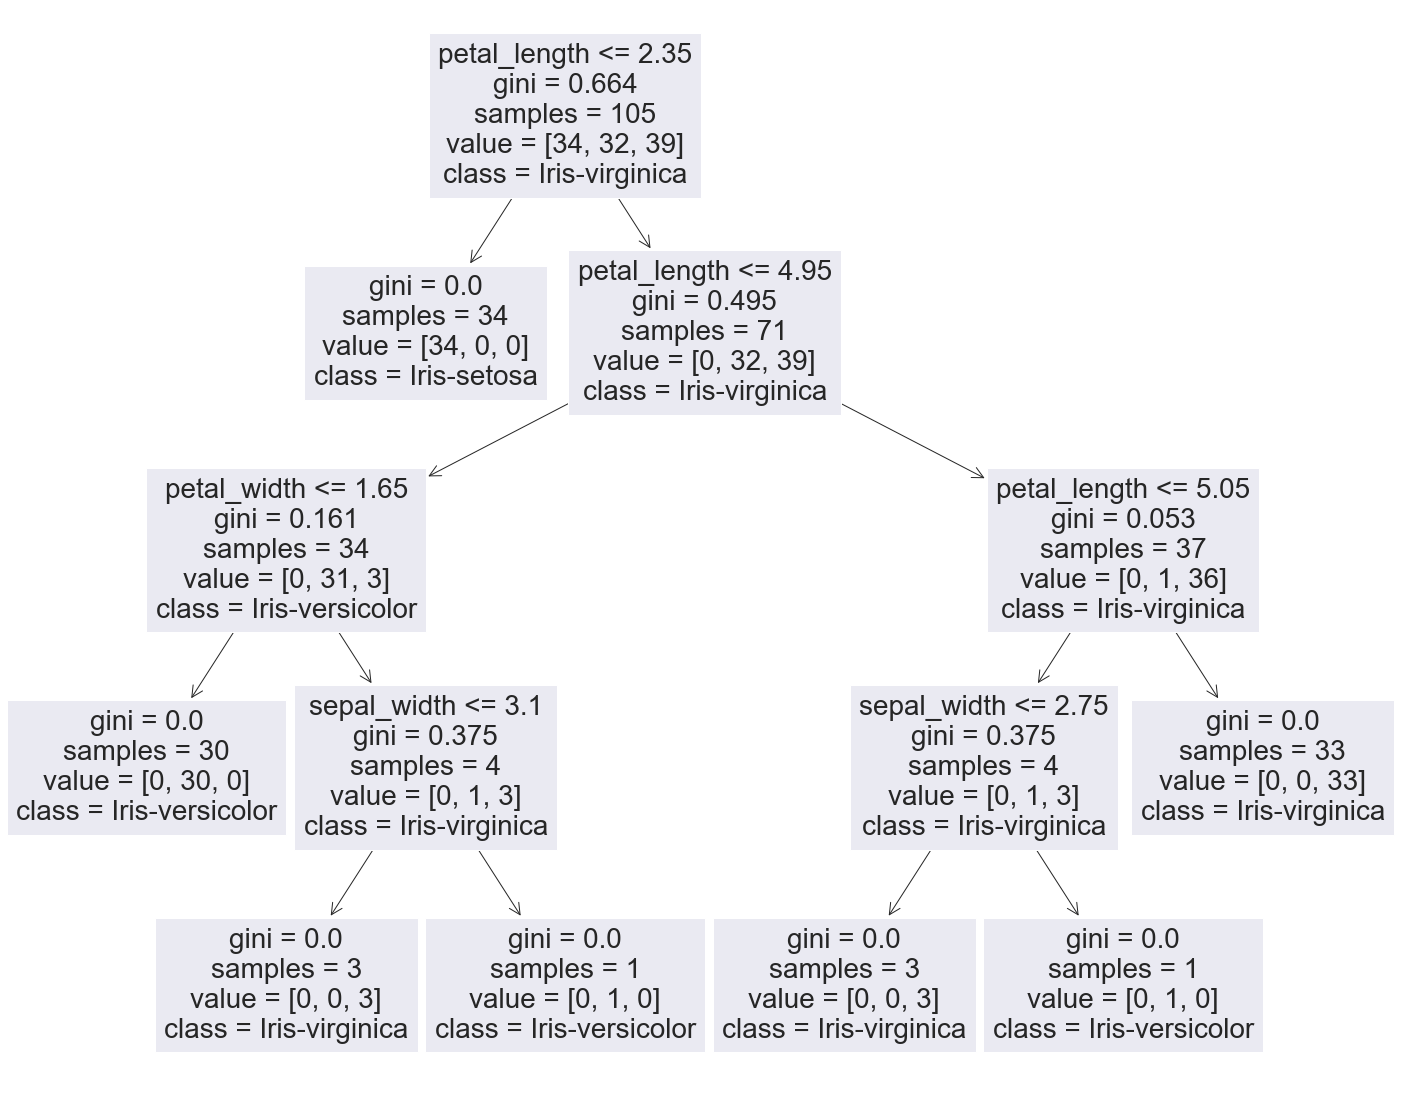

In [49]:
fig = plt.figure(figsize=(25,20))
dot_ = tree.plot_tree(D_tree, 
                   feature_names=df.drop(['species'],axis=1).keys(),  
                   class_names=df['species'].unique()
                     )

### Model Deployment

In [50]:
input_data = (4.9,2.4,3.3,1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = D_tree.predict(input_data_reshaped)
print(prediction)


if prediction[0] == 0:
    print('Iris-setosa')
elif prediction[0] == 1:
    print('Iris-versicolor')
else:
    print('Iris-virginica')


[1]
Iris-versicolor


### Thank You